In [4]:
import pandas as pd #(library for data manipulation and cleansing)
import numpy as np #(library for data manipulation)
import matplotlib.pyplot as plt #(library for data visulazation)
import seaborn as sns #(library for data visulazation THIS IS MOSTLY USED FOR VISULAZTION)

**Accomplish the following tasks.**
1. Read the data into Python using and name it as “studentdata”
2. Display the first row of the data frame to see the variable names.


**1. Importing the data:**

In [5]:
studentdata=pd.read_excel("Studentdata.xlsx")

**2. Display the first row of the data frame to see the variable names.**

Displaying the column names:

In [22]:
studentdata.columns

Index(['Student', 'Height', 'Gender', 'Shoes', 'Number', 'Dvds', 'ToSleep',
       'WakeUp', 'Haircut', 'Job', 'Drink'],
      dtype='object')

**-----------------------------------------------------------------------------------------**

**i. Let us Summarize and Graph a Single Batch of data (meaning single variable)**

**4. Construct a frequency distribution, relative frequency distribution and percentage distribution of the categorical variable Drink. What do you conclude about the drinking habit of students?**



-------------------------------------------
Creating a frequency table and storing it in a variable named freq.

In [43]:
freq=studentdata.Drink.value_counts()

In [44]:
freq

water    355
pop      178
milk     113
Name: Drink, dtype: int64

--------------------------------------------------------------------------
Creating a relative frequency table and storing it in a variable named r_freq.

In [49]:
r_freq= freq/studentdata.Drink.count()
r_freq


water    0.549536
pop      0.275542
milk     0.174923
Name: Drink, dtype: float64

------------------------------------------------------
Creating a percentage distribution:

In [51]:
round(r_freq*100, 2)

water    54.95
pop      27.55
milk     17.49
Name: Drink, dtype: float64

I can conclude that the majority of students (alomst 55%) prefer to drink water with
the evening meal. 

----------------------------------------------------------------

**5. Graph the frequency distribution obtained in (4) using bar plot. Make sure to label the x-axis and y-axis.**

<AxesSubplot:xlabel='Drink', ylabel='count'>

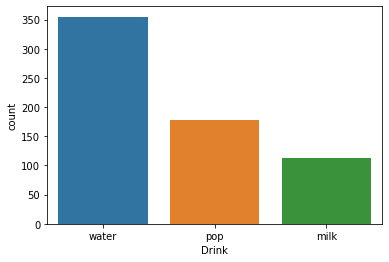

In [53]:
sns.countplot(data=studentdata, x="Drink")

**6. Suppose we are interested in examining how long the students slept the previous night. For this, first create a variable HofSleep as:  HofSleep = WakeUp - ToSleep**

**a. Obtain five number summary (descriptive) statistic: Min, Q1, Q2, Q3 and Max using summary() command. Interpret the result.**

**b. Construct a histogram using hist () command of sleeping times to see its distribution. Discuss the shape of the distribution.**


--------------------------------------------------------------------------------------------
Creating the new vairable HofSleep

In [56]:
studentdata['HofSleep']= studentdata['WakeUp']-studentdata['ToSleep']

studentdata.head(3)

,Student,Height,Gender,Shoes,Number,Dvds,ToSleep,WakeUp,Haircut,Job,Drink,HofSleep
0,1,67.0,female,10.0,5.0,10.0,-2.5,5.5,60.0,30.0,water,8.0
1,2,64.0,female,20.0,7.0,5.0,1.5,8.0,0.0,20.0,pop,6.5
2,3,61.0,female,12.0,2.0,6.0,-1.5,7.5,48.0,0.0,milk,9.0


**a. Obtain five number summary (descriptive) statistic: Min, Q1, Q2, Q3 and Max using summary() command. Interpret the result.**

In Python, the equivalente of summary() command is describe()

In [58]:
studentdata.HofSleep.describe()

count    653.000000
mean       7.385191
std        1.511810
min        2.500000
25%        6.500000
50%        7.500000
75%        8.500000
max       12.500000
Name: HofSleep, dtype: float64

-------------------------------------------------
The mean hours of sleep for the students was 7.385 with a standard deviation of 1.5.
The minimum hours of sleep was 2.5 hours and the maximum hours of sleep was 12.5; which are
considered as extreme values(outliers).
The median was 7.5; so, we might indicate that the distribution is bell-shaped because the mean and median are very close.

---------------------------------------------------------------------------------

**b. Construct a histogram of sleeping times to see its distribution. Discuss the shape of the distribution.**



<AxesSubplot:xlabel='HofSleep', ylabel='Count'>

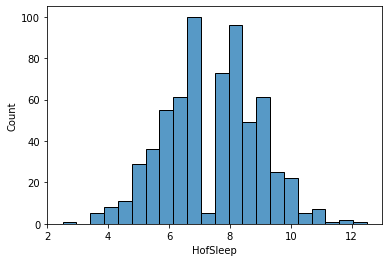

In [60]:
sns.histplot(data=studentdata, x="HofSleep")

Another avaible option is a KDE plot that comes with the Seaborn library.
A KDE plot is described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable.

<AxesSubplot:xlabel='HofSleep', ylabel='Density'>

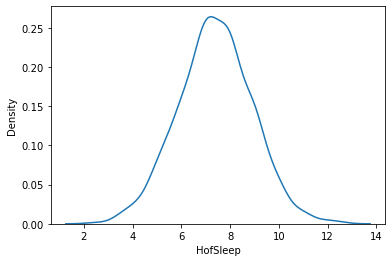

In [71]:
sns.kdeplot(data=studentdata, x='HofSleep')


By looking at the histogram and the KDE plot, the shape of the distribution is close to a bell-shape.

-----------------------------------------------------------------------

**ii. Let us compare Batches of data**

**7. Since the gender of each student was recorded, one can make comparisons between men and women on any of the quantitative variables. Do men tend to sleep longer than women? We can answer this question graphically by constructing parallel boxplots of the sleeping times of men and women. Parallel boxplots can be displayed using the boxplot() command.  What do you conclude?**


<AxesSubplot:xlabel='Gender', ylabel='HofSleep'>

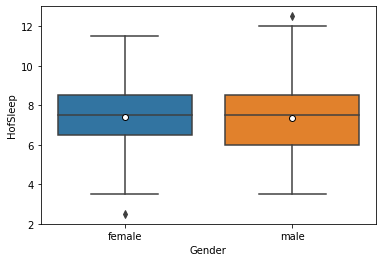

In [124]:
sns.boxplot(data=studentdata, y='HofSleep',x='Gender',showmeans=True,
           meanprops={"marker":'o','markerfacecolor':'white','markersize':6,'markeredgecolor':'black'})

Based on our data, I notice that Female and Male students tend to sleep almost the same amount of time as their means are almost indentical. We have some outliers in both genders, It is approprate to conduct a hypothesis testing (t-test) to compare the two groups. I will conduct it for the sake of practicing.

In [137]:
studentdata.groupby('Gender')['HofSleep'].mean() #Mean of each Group

Gender
female    7.396305
male      7.363318
Name: HofSleep, dtype: float64

F-test to check of population has equal varainces or not:


In [185]:
#Isolating the groups and combining them into a one dataframe;then converting to Excel to 
#conduct the hypothesis testing in Excel:

female=studentdata['HofSleep'][studentdata['Gender']=='female'].dropna()
female=female.reset_index(drop=True)
male=studentdata['HofSleep'][studentdata['Gender']=='male'].dropna()
male=male.reset_index(drop=True)

Gender_dataframe=pd.concat([male,female],axis=1) #create dataframe
#make a dataframe to an excel file and choose its path(destination on my pc):
Gender_dataframe.to_excel('C:/Users/anask/OneDrive/Desktop/w.xlsx')

**Using Excel: F-test**
--------------
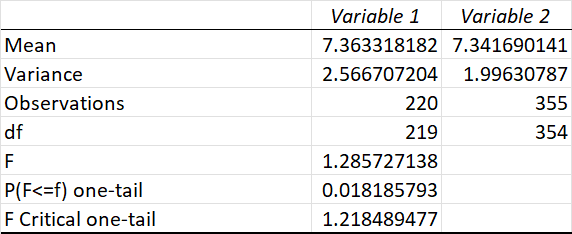


Since p-vale(0.0182) is less than 0.05, we reject the null hypothesis.
Therefore, there is a differnce in the population variances between the Male and Female.
For that reason, we conduct (t-test with unequal varainces)

**Using Excel:**
		
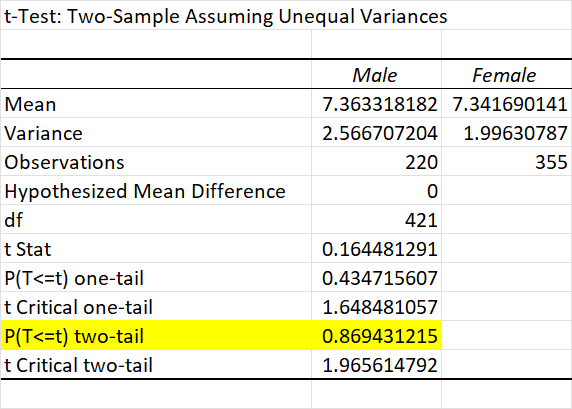

------------------------------------------------------------------------------------------
Since p-value(0.869) is greater than 0.05. We fail to reject the null hypothesis.
Therefore, The data show no evidence that there is a difference in the mean of the hours of sleep between the Males and Female. 


------------------------------------------------------------------------
**8. For other variables, there could be substantial differences between two genders. Suppose we wish to divide the haircut prices into groups-the haircut prices for the men and the haircut prices for the women. After creating two subsets of the haircut prices, summarize the haircut prices of the women and the men by using the summary() command. What do you conclude?**

In [195]:
studentdata.groupby(['Gender'])['Haircut'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
female,416.0,34.081466,30.435079,0.0,15.0,25.0,45.0,180.0
male,221.0,10.536109,8.347169,0.0,0.0,12.0,15.0,75.0


We can notice that female students spend much more money on haircuts compared to male students.

The mean is 34 dollars for female students and 10.5 dollars for male students. However, we have lots more female students compared to male students, and the mean is known to be affected by high values (outliers) and the female group has more than 55 students where their spending range between 70-180 dollars;therefore, It will be better to conduct another hypothesis testing to compare both groups. 

------------------------------------------------------------------------------------

**a. Construct a scatterplot of “ToSleep” and “Hours of sleep” with “ToSleep” on the horizontal scale and “HofSleep” on the vertical scale. In this plot, you may find that it is a little difficult to see the pattern because many points are identical.**

<AxesSubplot:xlabel='ToSleep', ylabel='HofSleep'>

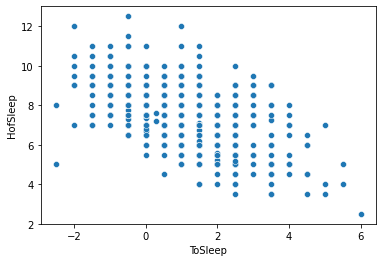

In [78]:
sns.scatterplot(data=studentdata, x="ToSleep",y='HofSleep')

b. Now, use the jitter function each variable in (a) (e.g. jitter(ToSleep)) before plotting-this has the effect of adding a small amount of noise so that more points are visible on the graph. Describe the pattern visible in the graph

Note: Jitter function is currently unfuncational in Seaborn, so I will use other techniques, such as
making the colors a little more transparent, using Histograms, KDE plot, and Rug plot (plots every point on the axis as a short line. It will be in red) on the x-axis and y-axis. All of the previous is called a jointplot used in Seaborn library.

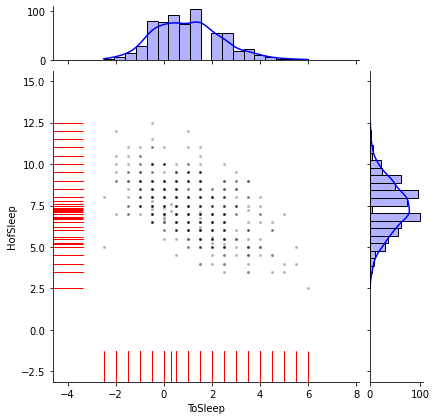

In [116]:
x= sns.jointplot(data=studentdata, x="ToSleep",y='HofSleep',
              alpha=0.3,kind='scatter',marginal_ticks=True,
              joint_kws={'marker':'.',"color":'black'},
             marginal_kws={'color':"blue",'kde':True,'alpha':0.3})
x.plot_joint(sns.rugplot,color='red',height=0.1)

I notice that there is a moderate negative correlation between "HofSleep" and "ToSleep" variables. The earlier the student goes to bed the more hours he will end up sleeping. 

-----------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------
**c. Perform least-square fit using the lm() command and include the output. Interpret the slope.**

I will conduct a quick simple Linear Regression Model without checking any of the assumptions nor splitting the model into a testing and training set because it didn't ask so in the question. Also, my answer might be slightly different because I had to drop some rows.

In [248]:
from sklearn.linear_model import LinearRegression
x=studentdata['ToSleep'].reset_index(drop=True).dropna()
X=np.array(x.head(653)).reshape(-1, 1)
y=studentdata['HofSleep'].reset_index(drop=True).dropna()
y=np.array(y)
lm=LinearRegression()
lm.fit(X,y)

LinearRegression()

In [249]:
print("The coeficient:",lm.coef_,'and the slope: ',lm.intercept_)

The coeficient: [-0.23562495] and the slope:  7.620130785513102


Y= -0.2356X + 7.62

Interperting the Slope:
when x=0 which means the student sleeps at 12:00 AM; he will sleep for 7.62 hours.

-----------------------------------------------------------------------------------------
**d. Display the fitted regression line on the top of the scatterplot constructed in (b) by using the abline() command.**

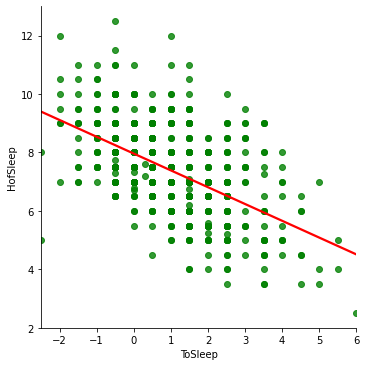

In [270]:
sns.lmplot(data=studentdata, x='ToSleep',y='HofSleep',
           ci=None,scatter_kws={'color':'green'},line_kws={'color':'red'})